In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/ba-task2/ba_task2_data.csv


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [198]:
data = pd.read_csv('Dataset/ba_task2_data.csv')
data.shape

(50000, 14)

In [150]:
data['wants_in_flight_meals'].value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [199]:
data.drop(['booking_origin', 'route','trip_type','sales_channel'], inplace=True, axis=1)

In [200]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [162]:
data.head()

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_in_flight_meals,booking_complete
0,262,19,7,1,0,0
1,112,20,3,0,0,0
2,243,22,17,1,0,0
3,96,31,4,0,1,0
4,68,22,15,1,1,0


In [176]:
data = data[['purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage','booking_complete']]

In [14]:
import seaborn as sns

In [59]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [201]:
X = data.loc[:, data.columns != 'booking_complete']
y = data['booking_complete']

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   purchase_lead   50000 non-null  int64
 1   length_of_stay  50000 non-null  int64
 2   flight_hour     50000 non-null  int64
 3   flight_day      50000 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [202]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)

In [167]:
X_train.shape, X_test.shape

((40000, 2), (10000, 2))

In [121]:
y_train.value_counts()

0    34018
1     5982
Name: booking_complete, dtype: int64

In [93]:
y_test.value_counts()

0    8504
1    1496
Name: booking_complete, dtype: int64

In [204]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [180]:
import matplotlib.pyplot as plt

In [181]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.058 seconds


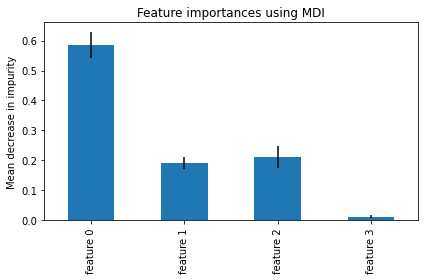

In [182]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [174]:
X_train.head(2)

,purchase_lead,flight_hour
11179,168,8
26739,54,1


Elapsed time to compute the importances: 8.442 seconds


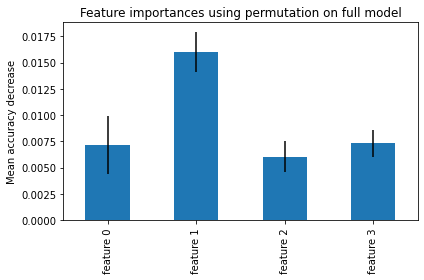

In [183]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

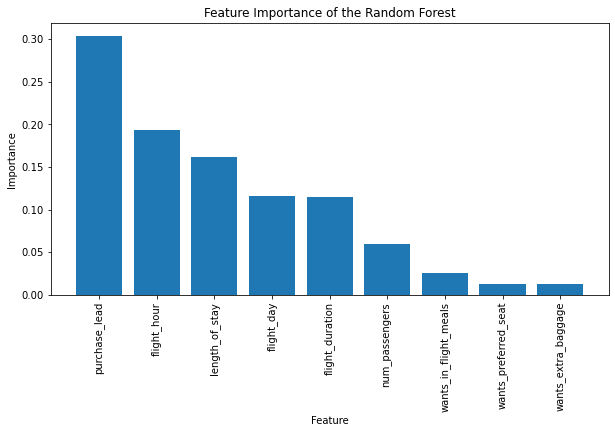

In [205]:
importances = forest.feature_importances_

# Get feature names
feature_names = X_test.columns

# Create a dataframe with feature importances and feature names
feature_importance = pd.DataFrame(list(zip(feature_names, importances)), columns=["Feature", "Importance"])

# Sort the dataframe by feature importances
feature_importance.sort_values(by=['Importance'], ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10,5))
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance of the Random Forest")
plt.show()


In [112]:
y_pred = forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## with 4 features ['purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage'],

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8504
           1       0.26      0.13      0.18      1496

    accuracy                           0.81     10000
   macro avg       0.56      0.53      0.54     10000
weighted avg       0.77      0.81      0.79     10000

